In [50]:
import numpy as np
import pandas as pd
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn .linear_model import LinearRegression

base_path=r"C:\Users\Rakesh\Downloads"

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


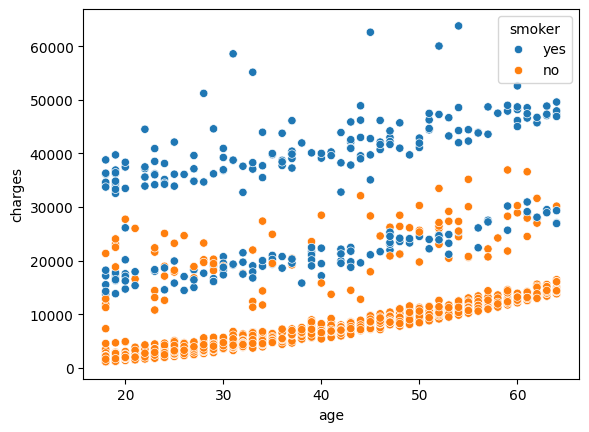

In [5]:
sns.scatterplot(data=df,x="age",y="charges",hue="smoker")
plt.show()

In [10]:
numerical_col=df.select_dtypes(include=[np.number]).columns

<Axes: >

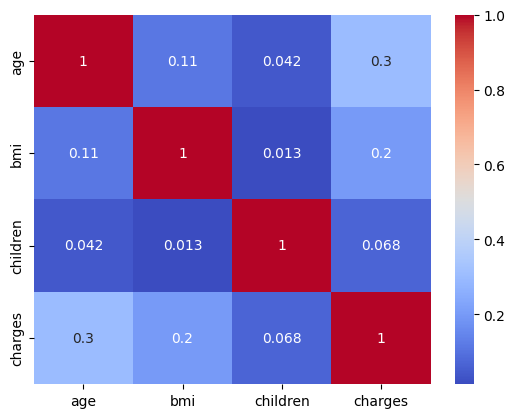

In [12]:
sns.heatmap(df[numerical_col].corr(),annot=True,cmap="coolwarm")

In [14]:
non_numerical_col=df.select_dtypes(include="object").columns
non_numerical_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
def label_encodding(df,list_of_col):
    label=LabelEncoder()
    for i in list_of_col:
        df[i]=label.fit_transform(df[i])

In [16]:
label_encodding(df,non_numerical_col)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

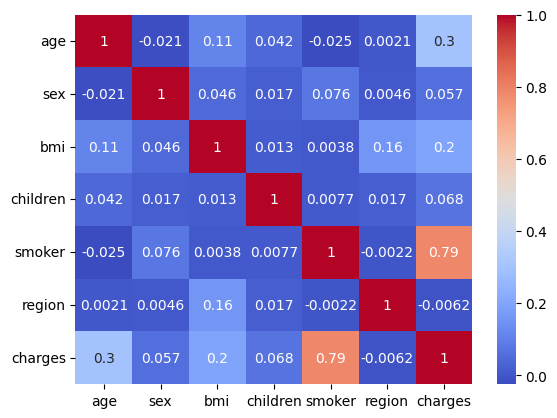

In [18]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [22]:
x=df.drop(columns="charges",axis=1)
y=df["charges"]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
param_grid = {
    'n_estimators': [ 500, 800],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [ 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}
rfg=RandomForestRegressor()

In [32]:
model=GridSearchCV(estimator=rfg,param_grid=param_grid,cv=5,verbose=2)

In [33]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total 

,estimator,RandomForestRegressor()
,param_grid,"{'bootstrap': [True], 'max_depth': [10, 20], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,800


In [34]:
model.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

In [35]:
print("Best Parameters", model.best_params_)
print("Best CV score",model.best_score_)

Best Parameters {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}
Best CV score 0.8289101391094779


In [36]:
xgb=XGBRegressor()

In [38]:
param_grid = {
    'n_estimators': [ 500, 800],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [ 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}
xbg=XGBRegressor()

In [42]:
model2=GridSearchCV(estimator=xbg,cv=5,param_grid=param_grid,verbose=0)

In [43]:
model2.fit(x_train,y_train)

c:\Users\Rakesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:45:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rakesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:45:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rakesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:45:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i,

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'bootstrap': [True], 'max_depth': [10, 20], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [45]:
print("Best parameter of XGB",model2.best_params_)
print("Best R2 score",model2.best_score_)

Best parameter of XGB {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best R2 score 0.7754068296384742


In [46]:
###linear regression
model3=LinearRegression()

In [47]:
model3.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
y_pred=model3.predict(x_test)

In [51]:
print("R2 score of linear regression",r2_score(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))

R2 score of linear regression 0.7694415927057693
RMSE 5814.246890069995
